# EXPLORATION_IC1 가위바위보

### train_data : 3207
### test_data: 300

In [1]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


## 학습 데이터 Resize 하기

In [2]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train/scissor/scissors_complete"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

994  images to be resized.
994  images resized.
가위 이미지 resize 완료!


In [3]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    
    print(len(images), "images to be resized.")
    
    #파일마다 모두 28x28사이즈로 바꾸어 저장하기
    target_size=(28,28)
    for img in images:
        old_img = Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img,"JPEG")
        
    print(len(images), "images resized.")
    
#바위 이미지가 저장된 디렉토리 아래의 모든 jpg파일을 읽어들임
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train/rock/rocks_complete"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!!")

1105 images to be resized.
1105 images resized.
바위 이미지 resize 완료!!


In [4]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    
    print(len(images), "images to be resized.")
    
    #파일마다 모두 28x28사이즈로 바꾸어 저장하기
    target_size=(28,28)
    for img in images:
        old_img = Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img,"JPEG")
        
    print(len(images), "images resized.")
    
#보 이미지가 저장된 디렉토리 아래의 모든 jpg파일을 읽어들임
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train/paper/papers_complete"
resize_images(image_dir_path)

1108 images to be resized.
1108 images resized.


In [33]:
import numpy as np

def load_data(img_path, number_of_data=3207):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/train/scissor/scissors_complete/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/train/rock/rocks_complete/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/train/paper/papers_complete/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path,3207)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3207 입니다.
x_train shape: (3207, 28, 28, 3)
y_train shape: (3207,)


## 이미지 불러오기

라벨:  0


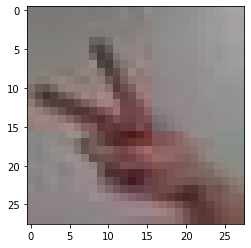

In [34]:
#이미지 불러오기
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [52]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1 = 16
n_channel_2 = 32
n_dense=16
n_train_epoch = 15
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))


model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 16)                12816     
_________________________________________________________________
dense_21 (Dense)             

In [53]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Epoch 1/15
101/101 [==============================] - 1s 3ms/step - loss: 1.0855 - accuracy: 0.4047
Epoch 2/15
101/101 [==============================] - 0s 3ms/step - loss: 0.9831 - accuracy: 0.5312
Epoch 3/15
101/101 [==============================] - 0s 3ms/step - loss: 0.7650 - accuracy: 0.6767
Epoch 4/15
101/101 [==============================] - 0s 3ms/step - loss: 0.5675 - accuracy: 0.7853
Epoch 5/15
101/101 [==============================] - 0s 3ms/step - loss: 0.4937 - accuracy: 0.8060
Epoch 6/15
101/101 [==============================] - 0s 3ms/step - loss: 0.3524 - accuracy: 0.8683
Epoch 7/15
101/101 [==============================] - 0s 3ms/step - loss: 0.3142 - accuracy: 0.8858
Epoch 8/15
101/101 [==============================] - 0s 3ms/step - loss: 0.2484 - accuracy: 0.9199
Epoch 9/15
101/101 [==============================] - 0s 3ms/step - loss: 0.2065 - accuracy: 0.9420
Epoch 10/15
101/101 [==============================] - 0s 3ms/step - loss: 0.2038 - accuracy: 0.9317

100 images to be resized.
100 images resized.
테스트 바위이미지 resize 완료!!
100 images to be resized.
100 images resized.
테스트 가위이미지 resize 완료!!
100 images to be resized.
100 images resized.
테스트 보 이미지 resize 완료!!
테스트데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)
라벨:  0


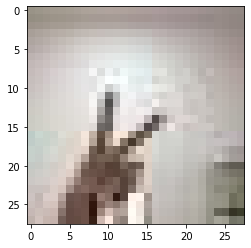

In [54]:
from PIL import Image
import os, glob
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    
    print(len(images), "images to be resized.")
    
    #파일마다 모두 28x28사이즈로 바꾸어 저장하기
    target_size=(28,28)
    for img in images:
        old_img = Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img,"JPEG")
        
    print(len(images), "images resized.")
    
#테스트 바위 이미지가 저장된 디렉토리 아래의 모든 jpg파일을 읽어들임
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("테스트 바위이미지 resize 완료!!")

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    
    print(len(images), "images to be resized.")
    
    #파일마다 모두 28x28사이즈로 바꾸어 저장하기
    target_size=(28,28)
    for img in images:
        old_img = Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img,"JPEG")
        
    print(len(images), "images resized.")
    
#테스트 바위 이미지가 저장된 디렉토리 아래의 모든 jpg파일을 읽어들임
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("테스트 가위이미지 resize 완료!!")


def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    
    print(len(images), "images to be resized.")
    
    #파일마다 모두 28x28사이즈로 바꾸어 저장하기
    target_size=(28,28)
    for img in images:
        old_img = Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img,"JPEG")
        
    print(len(images), "images resized.")
    
#테스트 보 이미지가 저장된 디렉토리 아래의 모든 jpg파일을 읽어들임
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("테스트 보 이미지 resize 완료!!")


def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path,300)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))


plt.imshow(x_test[0])
print('라벨: ', y_test[0])


## Model Test

In [55]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {}".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.2209 - accuracy: 0.7667
test_loss: 1.2209429740905762
test_accuracy: 0.7666666507720947
